## Note: After logging in I get fews pop-ups regarding- Save Your Login Info, Turn on Notifications. I have mannually handled these popups (Not using Selenium)

## Note: As the ahead questions are related to the previous questions, kindly evaluate the following questions in the given sequnce

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time
import re
from datetime import date
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
import matplotlib as mpl
from selenium.common.exceptions import TimeoutException 

In [2]:
driver = webdriver.Chrome('D:\Web Driver\chromedriver')
driver.get('https://www.instagram.com/')

## Login

In [3]:
def login(id, password):
    
    wait = WebDriverWait(driver, 10)
    text_box = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//input[@class = "_2hvTZ pexuQ zyHYP"]')))
    
    text_box[0].send_keys(id)
    text_box[1].send_keys(password)  
    
    login_button = driver.find_element_by_xpath('//button[@class = "sqdOP  L3NKy   y3zKF     "]')
    login_button.submit()

In [4]:
login('divyaang','19971125pinchu')

In [5]:
def search_and_open(profile):
    driver.refresh()
    wait = WebDriverWait(driver, 10)
    search_box = wait.until(EC.presence_of_element_located((By.XPATH, '//input[contains(@class, "XTCLo x3qfX")]')))

    search_box.clear()
    search_box.send_keys(profile)
    
    pro = wait.until(EC.element_to_be_clickable((By.XPATH, '//a[contains(@class, "yCE8d")]')))
    pro.click()

## 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [6]:
def get_handles_list(word):

    driver.refresh()
    wait = WebDriverWait(driver, 10)
    search_box = wait.until(EC.presence_of_element_located((By.XPATH, '//input[contains(@class, "XTCLo x3qfX")]')))

    search_box.clear()
    search_box.send_keys(word)
    
    _list = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//a[contains(@class, "yCE8d")]')))
    
    data = driver.page_source
    html_data = BeautifulSoup(data, 'html.parser')
    
    hlist = html_data.find_all(class_ = 'Ap253')
    
    insta_handle_list=[]
    i=1
    
    for handle in hlist:
        name = handle.string
        if name[0] != '#':
            insta_handle_list.append(name)
        if i==10:
            break
        i = i+1
    return insta_handle_list

In [7]:
def get_followers(handle):
    
    wait = WebDriverWait(driver, 10)
    search_and_open(handle)
    time.sleep(3)
    fol = wait.until(EC.presence_of_element_located((By.XPATH, '//span[contains(@class, "-nal3")]')))
    
    data = driver.page_source
    html_data = BeautifulSoup(data, 'html.parser')
    
    flist = html_data.find_all(class_ = '-nal3')
    f = flist[1].span['title']
    f = int(f.replace(',',''))
    return f

In [8]:
def get_followers_for_top10(word):

    handles = get_handles_list('food')
    d = {}
    for h in handles:
        d[h] = get_followers(h)

    print('First 10 handles are:')
    for k,v in d.items():
        print(k,':',v)

    keys = np.array(list(d.keys()))
    values = np.array(list(d.values()))

    ind = values.argsort()[::-1]
    ind = ind[:5]

    keys_5 = keys[ind]
    values_5 = values[ind]
    
    print()
    print('Top 5 handles which have the highest number of followers are:')
    for i in range(5):
        print(keys_5[i],':', values_5[i])
        
    return [keys, values, keys_5, values_5]


In [10]:
ans = get_followers_for_top10('food')

First 10 handles are:
great.food.eaters : 4123
foodie.in.you : 1009
foodtalkindia : 297854
foodbyrhea_rashila : 51
foodplatestory : 6625
food.babyy_ : 5508
food : 4123
food_belly11 : 6972
foodbymanvee : 9927
foodiesdelhite : 23627

Top 5 handles which have the highest number of followers are:
foodtalkindia : 297854
foodiesdelhite : 23627
foodbymanvee : 9927
food_belly11 : 6972
foodplatestory : 6625


## 1.2 Now Find the number of posts these handles have done in the previous 3 days

In [11]:
def get_days(d):
    
    year = int(d[0:4])
    month = int(d[5:7])
    day = int(d[8:10])

    from datetime import date

    current_time = datetime.datetime.now() 
    f_date = date(year, month, day)
    l_date = date(current_time.year, current_time.month, current_time.day)
    delta = l_date - f_date
    
    return delta.days

In [12]:
def get_last_three_days_post():

    no_of_days = 0
    count = 0

    while True:
        
        wait = WebDriverWait(driver, 10)
        dt = wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class, "c-Yi7")]')))

        data = driver.page_source
        html_data = BeautifulSoup(data, 'html.parser')

        date = html_data.find(class_ = '_1o9PC')
        d = date['datetime']
        no_of_days = get_days(d)

        if no_of_days < 4:
            count = count + 1
        else:
            break

        next_ = wait.until(EC.element_to_be_clickable((By.XPATH, '//a[contains(@class, "_65Bje  coreSpriteRightPaginationArrow")]')))
        next_.click()

        dt = wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class, "c-Yi7")]')))

    return count

In [13]:
def get_last_three_days_post_for_handles(handles):
    #handles = get_handles_list('food')
    
    print("Number of posts posted by Top 5 handles which have the highest number of followers in the previous 3 days are:")
    
    num = []
    for h in handles:

        search_and_open(h)
        time.sleep(2)

        wait = WebDriverWait(driver, 10)
        post = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "_9AhH0")]')))
        post.click()
        
        n = get_last_three_days_post()
        print(h,':', n)
        num.append(n)
        
    return [handles, num]

In [17]:
ans_12 = get_last_three_days_post_for_handles(ans[2])

Number of posts posted by Top 5 handles which have the highest number of followers in the previous 3 days are:
foodtalkindia : 2
foodiesdelhite : 0
foodbymanvee : 1
food_belly11 : 3
foodplatestory : 1


## 1.3 Depict this information using a suitable graph

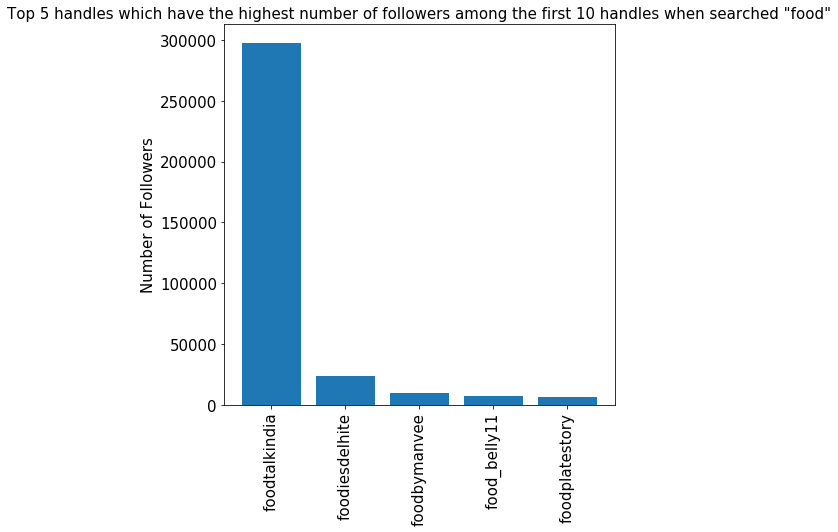

In [18]:
#Using ans form 1.1

rcParams['figure.figsize'] = 7,7
plt.bar(ans[2],ans[3])
plt.ylabel('Number of Followers',fontsize=15)
plt.title('Top 5 handles which have the highest number of followers among the first 10 handles when searched "food"',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

In [19]:
#USING ans_12 from 1.2
ans_12 = get_last_three_days_post_for_handles(ans[2])

Number of posts posted by Top 5 handles which have the highest number of followers in the previous 3 days are:
foodtalkindia : 2
foodiesdelhite : 0
foodbymanvee : 1
food_belly11 : 3
foodplatestory : 1


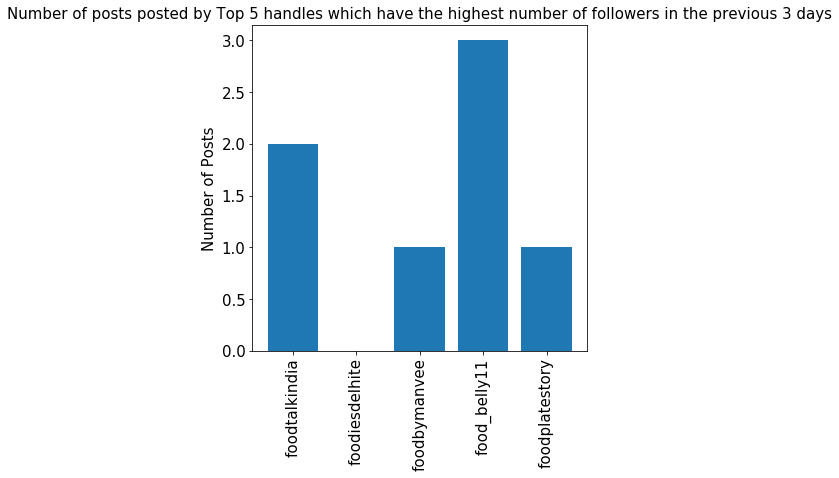

In [75]:
rcParams['figure.figsize'] = 6,6
plt.bar(ans_12[0],ans_12[1])
plt.ylabel('Number of Posts',fontsize=15)
plt.title('Number of posts posted by Top 5 handles which have the highest number of followers in the previous 3 days',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

## 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [20]:
def get_content():

    wait = WebDriverWait(driver, 10)
    post = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "_9AhH0")]')))
    post.click()
    
    count = 0
    content_list = []
    
    while count < 10:

        content = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))

        data = driver.page_source
        html_data = BeautifulSoup(data, 'html.parser')

        content_data = html_data.find(class_ = 'C4VMK')
        c = content_data.contents[1]
        content_list.append(list(c.stripped_strings))
        count = count + 1
        
        next_ = wait.until(EC.element_to_be_clickable((By.XPATH, '//a[contains(@class, "_65Bje  coreSpriteRightPaginationArrow")]')))
        next_.click()
        

    return content_list

In [21]:
def get_content_handles(handles):
    
    content_list = []
    
    for h in handles:
        search_and_open(h)
        time.sleep(2)
        content = get_content()
        
        print('The content of the first 10 posts of', h, 'are:')
        print()
        for l in content:
            for c in l:
                print(c)
            print("------------------------------------------------")
        print("****************************************************")
        print()
        content_list.append(content)
    return content_list
    

In [22]:
#handles = ['buzzfeedfood','dilsefoodie','foodtalkindia','foodiesdelhite','baebornfoodie']
#Using ans[2] from 1.1
ans_21 = get_content_handles(ans[2])

The content of the first 10 posts of foodtalkindia are:

Put on your pasta pants and bring your salted water to a boil—it's Mac n Cheese Day! Gooey, creamy mac and cheese will never be as healthy as a salad. But it can be healthier.
#HappyMacnCheeseDay
🤤🧀
We’ve got some insane upgrades for this classic comfort food:
- Use whole wheat pasta.
They give mac and cheese a heartier texture.
- Add more greens.
Get your daily dose of healthy greens by tossing them into cheesy pasta.
- Pump up the flavour with roasted garlic.
Rich and naturally creamy roasted garlic is a great way to make super satisfying mac and cheese without piling on too much cheese.
- Amp up cheese sauce with some vegetable puree.
Cut down on fat and add nutritional value by swapping out some of the cheese for a creamy squash puree.
- Replace some of the cheese with yogurt.
Mix yogurt with grated parmesan and garlic for an impossibly creamy, better-for-you sauce.
.
.
.
#MacnCheeseDay
#EasyRecipe
#macandcheese
-------------

The content of the first 10 posts of foodbymanvee are:

Want to cook something delicious but don't have time for preparing a great meal??Why fear when
@freshwayfood
is here!!So they are selling these ready to eat meals which made alot easier for everyone to make different meals in just 5 min,only with 3 simple steps:
Pour▶️Add Water▶️Stir &cover.
Then Wait for 5 min and tada ur meals are ready to serve.💯
@freshwayfood
sended their 2 yum products for me to try them out, Namely:
1)Veg biryani-(Experience the royal traditional mughlai main course loaded with chopped vegetables and a blend of various aromatic spices)This is definitely for all the biryani lovers,guys give this a try.Love this veg biryani,perfect taste&aroma with lot of veggies.🥕🍚
2)Dal fry-(Enjoy the authentic flavours of punjab in the appetizing dal,loaded with protein rich yellow lentils,and indian curry spices, sautéed in butter)This dal fry really tastes like"Mumma k hatho se bni dal"All the spices blended well,overall 

The content of the first 10 posts of food_belly11 are:

And what's baking today? If you know it , you know it. 🌺
.
.
.
Quiche Lorraine is the quiche of my dreams. Made with lots of bacon, onions, green peppers and my addition was some mushrooms. Swipe to see the filling. This was clicked exactly 10minute before the top got a little extra brown aka burnt. But look so beautiful. Totally can make you exceed your fat goals for the day or maybe week, but so worth it.
.
.
.
Have you tried quiche and do you like it?
.
.
.
#quiche
#lorraine
#breakfast
#brekkie
#foodbellybakes
#f52gram
#f52
#thekitchn
#dailygram
#dailyfood
#instafood
#instagood
#foodphotography
#foodforlife
#trellingfood
#eeeats
#yummy
#nomnom
#quaratinecooking
#quaratine2020
#homemade
#foodbellyinside
#food_belly11
#foodbelly
------------------------------------------------
Did someone ask for a banana mug cake recipe? 😍
.
.
.
The video is in its final editing stage and hopefully we'll have it in the next two days. But what I 

The content of the first 10 posts of foodplatestory are:

Every Day is Mangoficient 😜
.
.
I am Enjoying my Mangoish Sunday😋
.
.
So what experiments have you done with mangoes in this Quarantine? Let me know in Comments😉
.
.
.
.
.
.
.
🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼
FOLLOW
@foodplatestory
FOLLOW
@foodplatestory
FOLLOW
@foodplatestory
🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼
.
.
.
#mangos
#mango
#mangoes
#mangolover
#fruit
#foodie
#mangomango
#foodplatestory
#foodphotography
#mangosmoothie
#food
#fruits
#vegan
#foodporn
#freshfruit
#mangojuice
#foodblogger
#mangoseason
#summer
#mangotree
#healthyfood
#love
#mangonada
#bhfyp
#mangolovers
#healthy
#smoothie
#organic
#delicious
#foodiee_chiru
------------------------------------------------
6K FAMILY
.
.
.
I am overwhelmed by the help and love i get from all my supporters. Much grateful to you for being such a great supportive. Much obliged to you all.
.
.
Thankyou everyone ❤
.
HOMEMADE CHOCOLATE CAKE FOR MY INSTA FAMILY🍰
.
.
LOVE YOU ALL ❤
Keep Supporting like this always. 🌸
.
.
.
🌸🌸🌸🌸🌸🌸🌸🌸

## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word

In [23]:
def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"                       
        "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
    

In [30]:
def get_word_freq(content_list):
    d = {}
    d_h = {}

    for h in content_list:
        for l in h:
            for s in l:
                s = remove_emoji(s)
                s = s.replace('-',' ')
                s = s.replace('.',' ')
                s = s.replace(',',' ')
                s = s.replace('!','')
                s = s.replace('?','')
                s = s.replace(':','')
                s = s.replace('(','')
                s = s.replace(')','')
                s = s.replace('/','')
                s = s.replace("'",'')
                s = s.replace('"','')
                s = s.replace('•','')
                s = re.sub(" \d+", " ", s)
                for w in s.split(" "):
                    if w != " " and w != "":
                        d[w] = d.get(w,0) + 1
                        if w[0] == '#':
                            d_h[w] = d_h.get(w,0) + 1
    return [d, d_h]
    

In [34]:
#Using ans_21 from 2.1
ans_22 = get_word_freq(ans_21)

# Result description:
# ans_22[0] is a dictinary with all words (including hastags) as keys and their frequency as values
# ans_22[1] is a dictinary with only all hastags as keys and their frequency as values


print('List of all words used in all the scraped posts along with the frequency of each word are:')
for k,v in ans_22[0].items():
    if k.isnumeric():
        continue
    else:
        print(k,':', v)

List of all words used in all the scraped posts along with the frequency of each word are:
Put : 1
on : 29
your : 22
pasta : 4
pants : 1
and : 133
bring : 1
salted : 1
water : 4
to : 89
a : 81
boil—its : 1
Mac : 1
n : 1
Cheese : 1
Day : 6
Gooey : 1
creamy : 4
mac : 3
cheese : 7
will : 5
never : 3
be : 11
as : 12
healthy : 9
salad : 1
But : 6
it : 40
can : 7
healthier : 1
#HappyMacnCheeseDay : 1
We’ve : 1
got : 3
some : 14
insane : 2
upgrades : 1
for : 56
this : 35
classic : 2
comfort : 2
food : 8
Use : 2
whole : 2
wheat : 2
They : 4
give : 2
heartier : 1
texture : 1
Add : 9
more : 8
greens : 2
Get : 2
daily : 1
dose : 1
of : 72
by : 9
tossing : 1
them : 8
into : 6
cheesy : 1
Pump : 1
up : 11
the : 95
flavour : 1
with : 51
roasted : 2
garlic : 12
Rich : 1
naturally : 1
is : 36
great : 6
way : 5
make : 7
super : 4
satisfying : 1
without : 4
piling : 1
too : 2
much : 6
Amp : 1
sauce : 10
vegetable : 3
puree : 4
Cut : 1
down : 3
fat : 2
add : 8
nutritional : 1
value : 1
swapping : 1
out : 

low : 2
leave : 1
Now : 3
strain : 1
honey : 2
waiting : 1
immune : 1
boosting : 1
Websitewww : 1
arousetea : 1
comand : 1
yours : 2
#arousetea : 1
#moringatea : 1
#gingertea : 1
#greentea : 2
#immunitybooster : 1
#nutrition : 1
#ginger : 1
#teabags : 1
#honey : 1
#drinkhealthy : 1
#turmerictea : 1
#promotion : 1
#sksfever67 : 1
#instablogger : 1
#moringa : 1
#tealovers : 1
#moringabenefits : 1
#moringarecipes : 1
#mydailyzroutine : 1
#stayhealthy : 1
#drumsticktree : 1
#abs0lutebest : 1
#morningtea : 1
#healthyliving : 1
brand : 1
nameAgri : 1
Club : 2
@agri : 2
club : 4
@Agri : 1
leading : 1
manufacturers : 1
suppliers : 1
exporters : 1
many : 2
Bikaneri : 1
Rajasthan : 1
India : 1
Est : 1
providing : 1
purely : 1
Herbs : 1
seeds : 2
fiber : 1
greenteas : 1
herbal : 1
capsules : 1
varities : 1
readily : 2
customers : 1
globe : 1
Their : 1
finest : 1
freshness : 1
intact : 1
open : 1
Agri : 2
100%Pure : 1
100%Vegan : 1
GMO : 1
Certified : 1
FSSAI : 1
wide : 1
variety : 1
flipkart : 1


## 2.3 Create a csv file with two columns : the word and its frequency

In [35]:
def create_csv(d):
    l = []
    for k, v in d.items():
        l.append([k,v])
    
    df = pd.DataFrame(l, columns=['Word','Frequency'])
    df.to_csv('word_freq.csv', index=False)
    return

In [36]:
#Using ans_22 from 2.2
create_csv(ans_22[0])

## 2.4 Now, find the hashtags that were most popular among these bloggers

In [37]:
def get_popular_hastags(d):
    
    keys = np.array(list(d.keys()))
    values = np.array(list(d.values()))

    ind = values.argsort()[::-1]
    ind = ind[:10]

    keys_10 = keys[ind]
    values_10 = values[ind]
    
    print()
    print('Top 10 hashtags that were most popular among these bloggers are:')
    for i in range(10):
        print(keys_10[i],':', values_10[i])
        
    return [keys_10, values_10]
    

In [38]:
#Using ans_22 from 2.2
ans_24 = get_popular_hastags(ans_22[1])


Top 10 hashtags that were most popular among these bloggers are:
#foodie : 19
#homemade : 18
#foodphotography : 15
#instafood : 14
#delhifood : 11
#foodblogger : 11
#yummy : 10
#food : 10
#foodporn : 10
#delhifoodie : 10


## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

Hashtag #foodie was used 19 times
Hashtag #homemade was used 18 times
Hashtag #foodphotography was used 15 times
Hashtag #instafood was used 14 times
Hashtag #delhifood was used 11 times


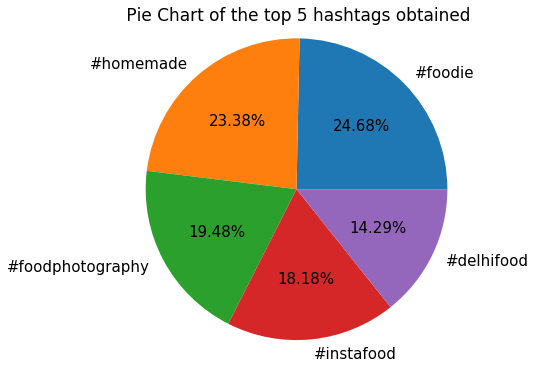

In [40]:
#Using ans_24 from 2.4
for i in range(5):
    print('Hashtag', ans_24[0][i], 'was used', ans_24[1][i], 'times')
rcParams['figure.figsize'] = 6,6
plt.pie(ans_24[1][:5], labels = ans_24[0][:5], autopct = '%.2f%%', labeldistance=1.1)
plt.title(' Pie Chart of the top 5 hashtags obtained',fontsize=17)
plt.axis('equal')
mpl.rcParams['font.size'] = 15
plt.show()

## 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier

In [41]:
def get_likes():

    wait = WebDriverWait(driver, 10)
    post = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "_9AhH0")]')))
    post.click()

    l = []
    count = 0

    while True:

        try:
            wait = WebDriverWait(driver, 3)
            #like = wait.until(EC.presence_of_element_located((By.XPATH, '//span[contains(@class, "qBUYS _7CSz9 FGFB7 videoSpritePlayButton")]')))

            view = wait.until(EC.element_to_be_clickable((By.XPATH, '//span[contains(@class, "vcOH2")]')))
            view.click() 

            data = driver.page_source
            html_data = BeautifulSoup(data, 'html.parser')

            likes = html_data.find(class_ = 'vJRqr')
            like = likes.span.string 
            like = int(like.replace(",",""))

            back = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "QhbhU")]')))
            back.click()

        except TimeoutException:
            
            wait = WebDriverWait(driver, 5)
            ll = wait.until(EC.element_to_be_clickable((By.XPATH, '//button[contains(@class, "sqdOP")]')))
            
            data = driver.page_source
            html_data = BeautifulSoup(data, 'html.parser')

            likes = html_data.find_all(class_ = 'sqdOP')
            like = likes[2].span.string 
            if like is None:
                like = likes[3].span.string
            like = int(like.replace(",",""))

        l.append(like)
        count = count + 1

        if count == 10:
            break

        next_ = wait.until(EC.element_to_be_clickable((By.XPATH, '//a[contains(@class, "_65Bje  coreSpriteRightPaginationArrow")]')))
        next_.click()

    return l


In [42]:
def get_likes_handle(handles):
    d = {}
    for h in handles:
        search_and_open(h)
        time.sleep(2)
        l = get_likes()
        d[h] = l
        print('Number of likes of the top 10 posts of', h, 'are:')
        for i in l:
            print(i)
        print()   
    return d

In [44]:
# Using ans[2] from 1.1
ans_31 = get_likes_handle(ans[2])
#ans_31 = get_likes_handle(['foodtalkindia'])

Number of likes of the top 10 posts of foodtalkindia are:
853
662
1018
250
797
131
643
759
187
2528

Number of likes of the top 10 posts of foodiesdelhite are:
339
306
184
154
190
126
193
158
226
195

Number of likes of the top 10 posts of foodbymanvee are:
1172
1193
1180
1148
1181
1160
1330
506
1653
1534

Number of likes of the top 10 posts of food_belly11 are:
90
73
149
86
97
41
79
100
100
170

Number of likes of the top 10 posts of foodplatestory are:
496
619
596
553
824
470
676
773
559
648



## 3.2 Calculate the average likes for a handle

In [78]:
def get_average_likes(d):
    d_avg = {}
    for k,v in d.items():
            avg = sum(v) // 10
            d_avg[k] = avg
    return d_avg

In [79]:
#Using ans_31 from 3.1
ans_32 = get_average_likes(ans_31)

print('Average likes for each handle are:')
for k,v in ans_32.items():
    print(k, ":", v)

Average likes for each handle are:
foodtalkindia : 782
foodiesdelhite : 207
foodbymanvee : 1205
food_belly11 : 98
foodplatestory : 621


## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [80]:
def get_average_followers_like_ratio(k_5, f_5, d):
    d_ratio={}
    for i in range(5):
        d_ratio[k_5[i]] = (f_5[i])//(d[k_5[i]])
    return d_ratio

In [82]:
#Using ans from 1.1 and ans_32 from 3.2

ans_33 = get_average_followers_like_ratio(ans[2], ans[3], ans_32)

print('Average followers:like ratio of each handle are:')
for k,v in ans_33.items():
    print(k, ":", v)

Average followers:like ratio of each handle are:
foodtalkindia : 380
foodiesdelhite : 114
foodbymanvee : 8
food_belly11 : 71
foodplatestory : 10


## 3.4 Create a bar graph to depict the above obtained information

In [83]:
## Using ans_32 and ans_33 from 3.2 and 3.3 respectively

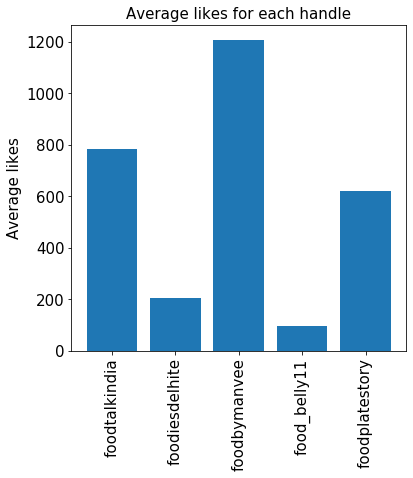

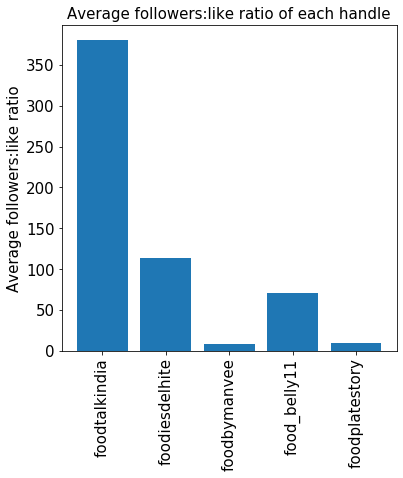

In [84]:
keys_32 = np.array(list(ans_32.keys()))
values_32 = np.array(list(ans_32.values()))

rcParams['figure.figsize'] = 6,6
plt.bar(keys_32,values_32)
plt.ylabel('Average likes',fontsize=15)
plt.title('Average likes for each handle',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

keys_33 = np.array(list(ans_33.keys()))
values_33 = np.array(list(ans_33.values()))

plt.bar(keys_33,values_33)
plt.ylabel('Average followers:like ratio',fontsize=15)
plt.title('Average followers:like ratio of each handle',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()